# Regression Multi Variable 

In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = boston.target
df_boston.head()

/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df_boston.shape

(506, 14)

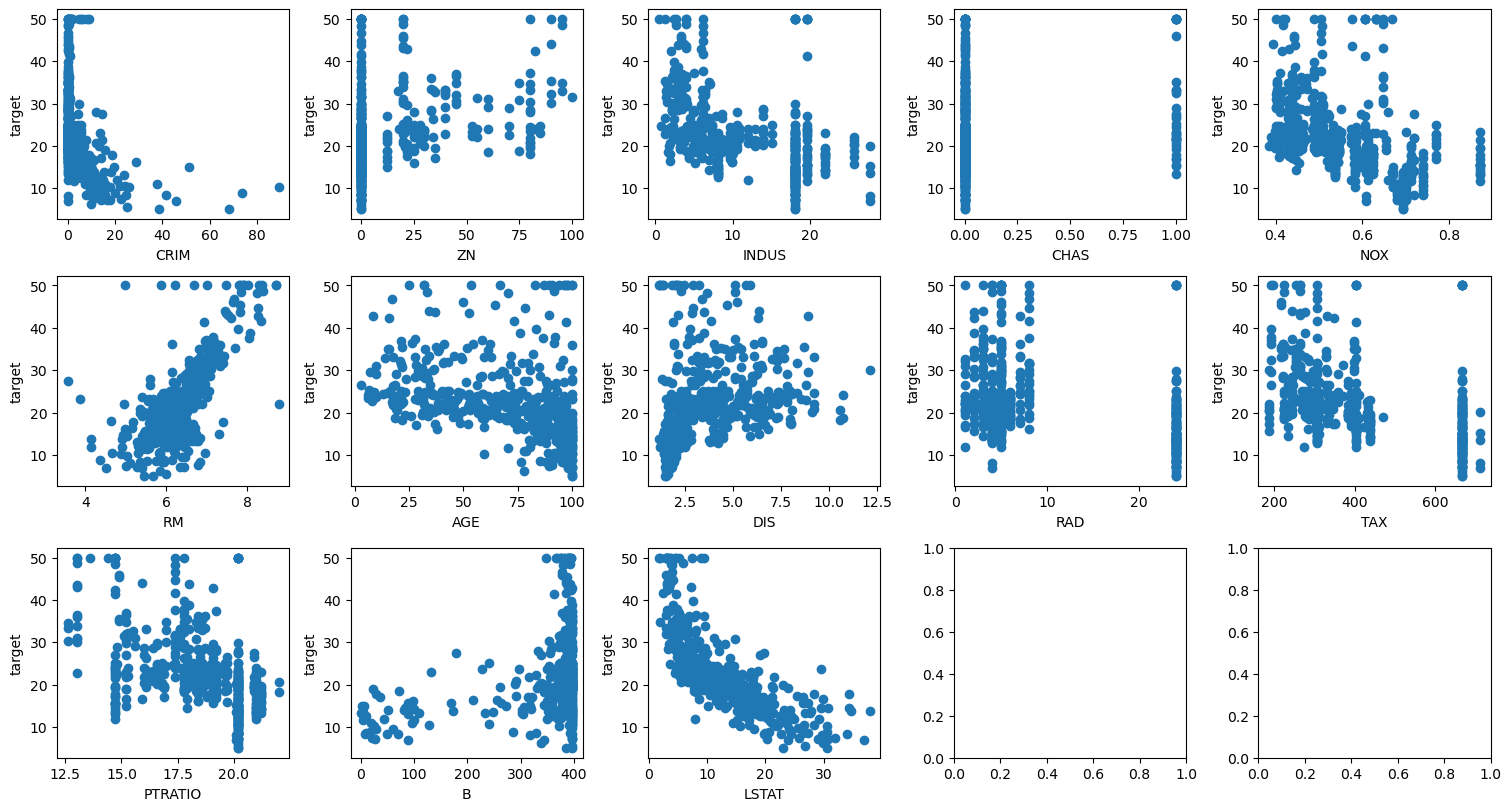

In [31]:
# visualize the relationship between the features and the response using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.pairplot(df_boston, x_vars=boston.feature_names, y_vars='target')


fig, axes = plt.subplots(3, 5,figsize=[15,8],constrained_layout=True)
axes = axes.flatten()
i=0
for x in df_boston.columns[:-1]:
    plt.sca(axes[i]) # set the current Axes
    plt.scatter(df_boston[x],df_boston.target)
    plt.xlabel(x)
    plt.ylabel("target")
    i+=1
    
plt.show()


<AxesSubplot:xlabel='LSTAT', ylabel='target'>

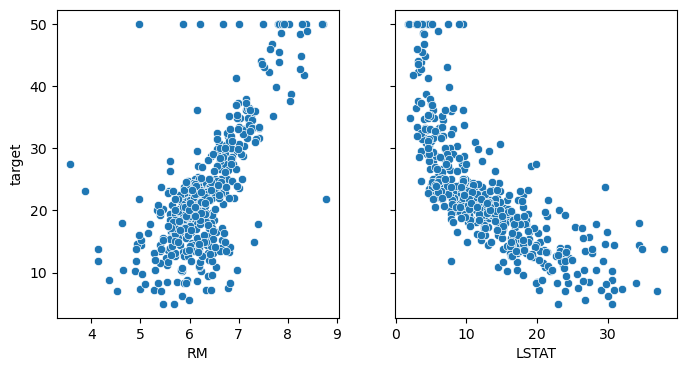

In [32]:
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=[8,4])
sns.scatterplot(x=df_boston['RM'], y=df_boston.target, ax=ax1)
sns.scatterplot(x=df_boston['LSTAT'], y=df_boston.target, ax=ax2)


<AxesSubplot:xlabel='LSTAT', ylabel='target'>

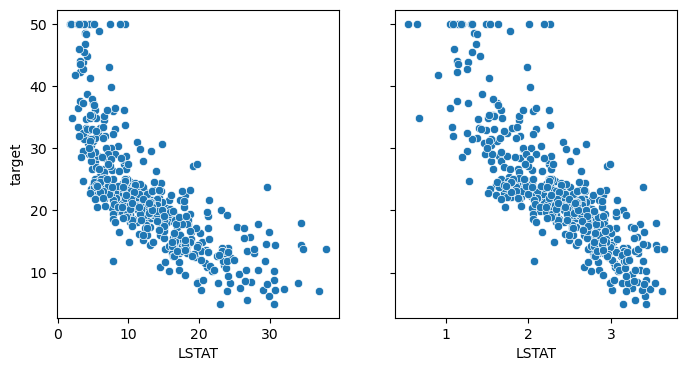

In [33]:
import numpy as np 
log_LSTAT=np.log(df_boston['LSTAT'])

#log_CRIM=np.log(df_boston['CRIM'])

# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=[8,4])
sns.scatterplot(x=df_boston['LSTAT'], y=df_boston.target, ax=ax1)
sns.scatterplot(x=log_LSTAT, y=df_boston.target, ax=ax2)
#sns.scatterplot(x=log_CRIM, y=df_boston.target, ax=ax1)                          

<AxesSubplot:xlabel='target', ylabel='Count'>

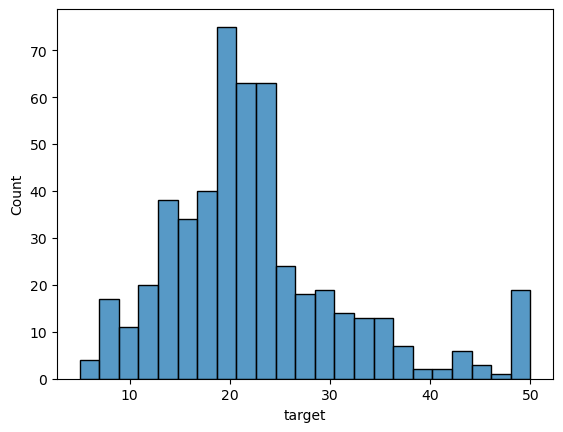

In [34]:
sns.histplot(data=df_boston, x='target')


In [35]:
#We can compute the correlation 
df_boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


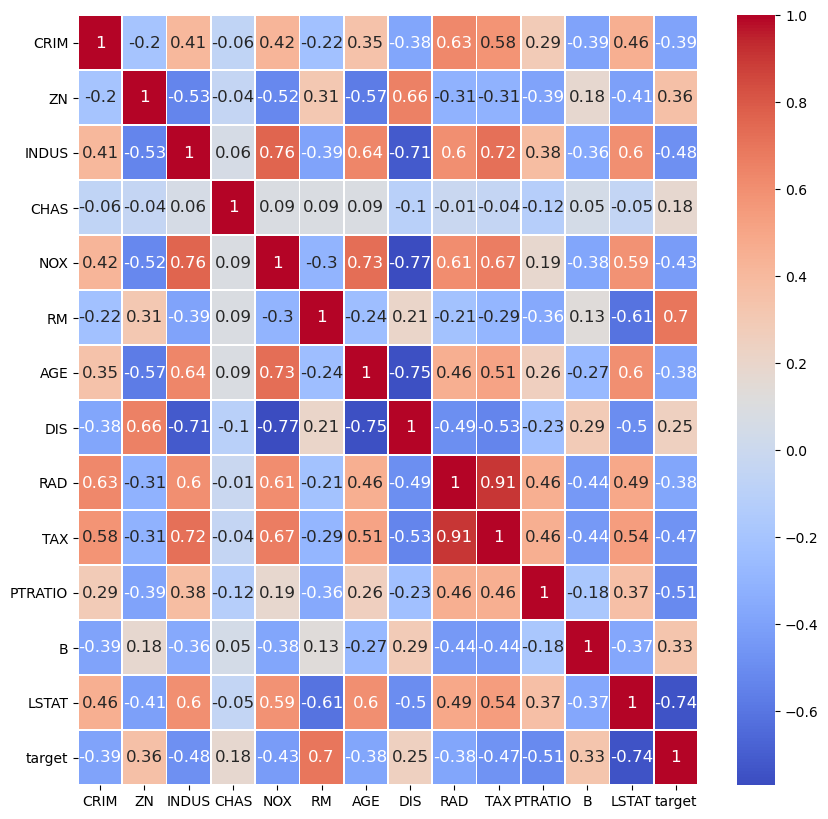

In [36]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_boston.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

###  Brief discussion on correlation

In [37]:
import pandas as pd
df_q = pd.read_csv("quadratic.csv") 

df_q.columns

Index(['x', 'y'], dtype='object')

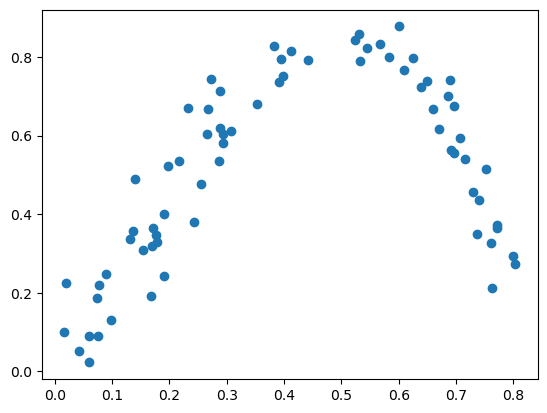

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df_q["x"], df_q["y"], 'o')

In [39]:
df_q.corr()

,x,y
x,1.000000,0.448615
y,0.448615,1.000000


In [40]:
import math 
df_q["x2"]=df_q["x"].apply(lambda x: -(x-0.5)**2)

In [41]:
df_q

,x,y,x2
0,0.154537,0.308410,-0.119345
1,0.175968,0.346179,-0.104997
2,0.140914,0.488696,-0.128943
3,0.265104,0.604524,-0.055176
4,0.232524,0.669098,-0.071544
...,...,...,...
67,0.255167,0.477284,-0.059943
68,0.198173,0.522641,-0.091099
69,0.285703,0.535777,-0.045923
70,0.306991,0.611045,-0.037253


In [42]:
df_q.corr()

,x,y,x2
x,1.000000,0.448615,0.663367
y,0.448615,1.000000,0.895750
x2,0.663367,0.895750,1.000000


In [43]:
from sklearn.linear_model import LinearRegression

simple_regr=LinearRegression()
simple_regr.fit(df_q[["x","x2"]], df_q["y"])

y_pred=simple_regr.predict(df_q[["x","x2"]])


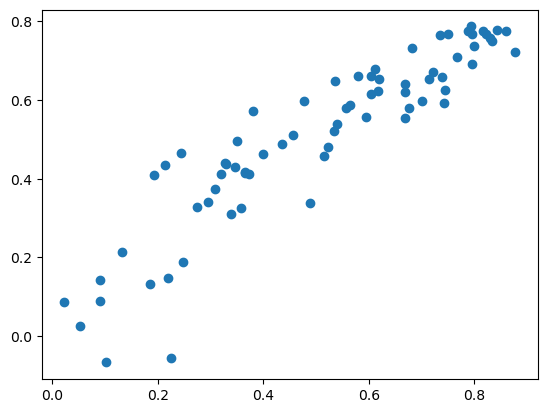

In [44]:
plt.plot(df_q["y"],y_pred,'o')

In [45]:
from sklearn import metrics

print("r2: ",metrics.r2_score(df_q["y"], y_pred ))

r2:  0.8402253913279958


## Select data

In [46]:
from sklearn.model_selection import train_test_split
import numpy as np

# Separate features and target variables
X = df_boston.iloc[:,:-1] #if I want to use all variables
y = df_boston.iloc[:,-1]

#choose your approach:
#X = df_boston.iloc[:,[4,5,10,11,12]] #if I want to use only some variable
#X = X.drop(['INDUS','CHAS','AGE','B'], axis=1) #if I want to drop some columns
#X = X[['RM','LSTAT']]#if I want to select some columns
X["LSTAT2"] = np.log(X.LSTAT) #if I want to log transform the LSTAT variable 
#X["CRIM2"] = np.log(X.CRIM) #if I want to log transform the LSTAT variable 

columns = X.columns #column names

In [47]:
#X=X[['RM','LSTAT2']]

# Filter the unusual observation
X=X[y<50]
y=y[y<50]

In [52]:
X=X[['RM','LSTAT2']]

In [53]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: target, dtype: float64

In [54]:
X.head()

,RM,LSTAT2
0,6.575,1.605430
1,6.421,2.212660
2,7.185,1.393766
3,6.998,1.078410
4,7.147,1.673351


In [58]:
#Scale and select Train/Test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)


In [59]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = LinearRegression() #(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
parameters = {}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters,cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out

#gs.score(X_train, y_train)
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.697470 using {}
0.697470 (0.021941) with: {}


0.7406162257502733

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

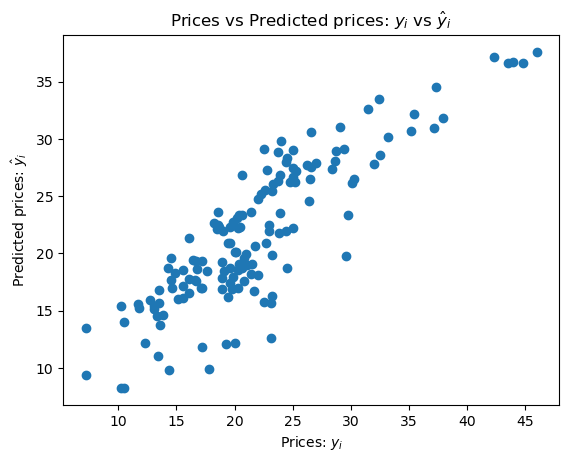

In [60]:
plt.scatter(y_test, gs.predict(X_test))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [61]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

gs.best_estimator_.coef_

#import pandas as pd
#pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

Intercept:  21.580968845360605


array([ 1.99177334, -5.18157034])

In [62]:
X.columns

Index(['RM', 'LSTAT2'], dtype='object')

In [63]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_squared_error

print("MSE train: ", mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ", mean_squared_error(y_test, gs.predict(X_test)))

MSE train:  19.42701099524284
MSE test:  13.83526572112469


# computing MAE, MSE, RMSE, r²
 - Mean Absolute Error (MAE): $$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
 - Mean Squared Error  (MSE): $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
 - Root Mean Squared Error (RMSE) : $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [64]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",metrics.r2_score(y_train, gs.predict(X_train)))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  3.313670567243035
MSE train:  19.42701099524284
RMSE train:  4.407608307828957
r2:  0.7025830740338781
MAE test:  3.0330413379119725
MSE test:  13.83526572112469
RMSE test:  3.719578702101179
r2:  0.7406162257502733


In [65]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

error_train.describe()

count    3.430000e+02
mean     1.134175e-15
std      4.414047e+00
min     -1.498999e+01
25%     -2.242607e+00
50%      3.869371e-01
75%      2.641709e+00
max      1.407550e+01
Name: target, dtype: float64

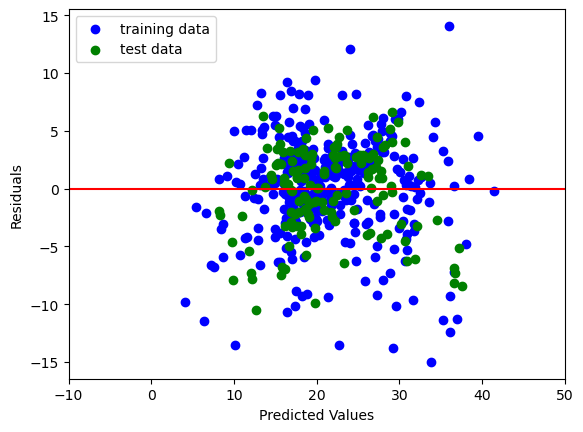

In [66]:
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [70]:
nb_error_train = np.array(error_train).flatten()

error_train = np.array(error_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()


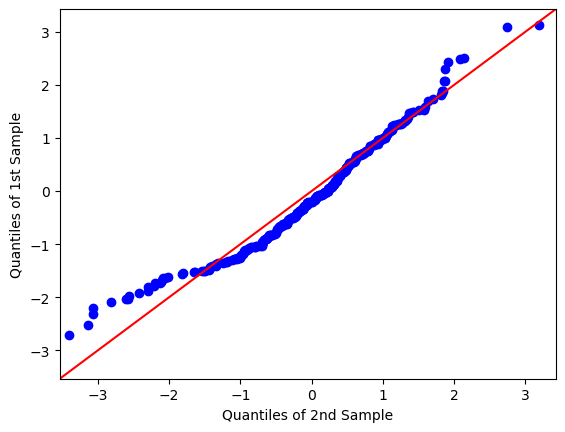

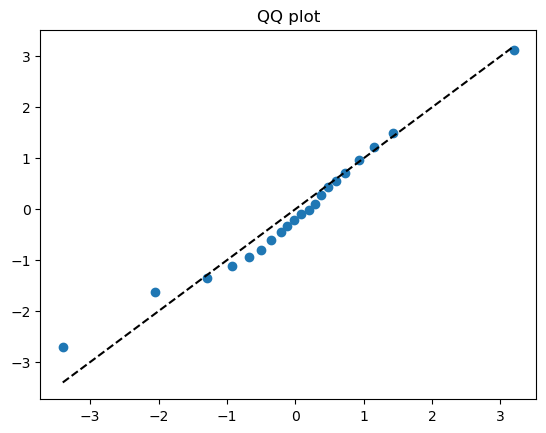

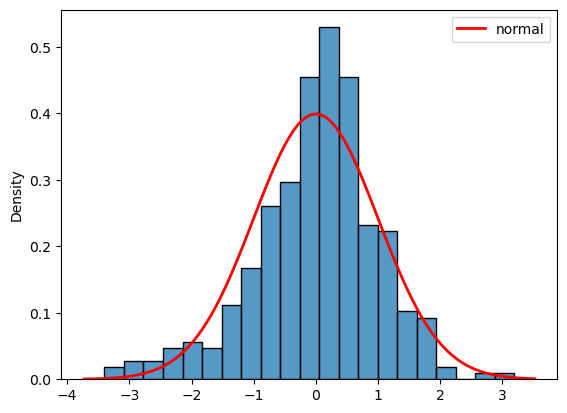

In [71]:
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt

# We test a exponential distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(nb_error_train)

err_mean=param[-2]
err_std=param[-1]

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(nb_error_train))

# qq-plot using statsmodels
qqplot_2samples(test_dist,np.array(nb_error_train).flatten(), line='45')
plt.show()

# We create the percentiles for both distributions
test_dist.sort()
percs = np.linspace(0,100,21)
q_a = np.percentile(nb_error_train, percs)
q_b = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()


# plot the distribution and compare with a normal

ax = sns.histplot(nb_error_train, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
ax.legend() 

#plt.hist(nb_error_train,alpha=.3, density=True,bins='auto')
#plt.hist(test_dist,alpha=.3, density=True,bins='auto')
#plt.show()

In [72]:
# Kolmogorov-Smirnov Test
from scipy import stats
print(stats.kstest(scaled_error_train, "norm"))
print(stats.kstest(nb_error_train, test_dist))
# normality tests use a (0,1) normal distribution 
# D'agostino normality test
print(stats.normaltest(scaled_error_train))
# Shapiro test of normality
print(stats.shapiro(scaled_error_train))

KstestResult(statistic=0.07116973239260349, pvalue=0.05897002557355491)
KstestResult(statistic=0.10787172011661808, pvalue=0.03688160173185647)
NormaltestResult(statistic=23.899206471152993, pvalue=6.461796159331203e-06)
ShapiroResult(statistic=0.9740846157073975, pvalue=7.887590072641615e-06)


## Test parameters (statsmodels)

In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X_train = sm.add_constant(X_train)
#If we want to add a constant to our model 
est = sm.OLS(y_train, X_train)
est_fit = est.fit()
est_fit.params

const     21.580969
RM         1.991773
LSTAT2    -5.181570
dtype: float64

In [69]:
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     401.6
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           2.97e-90
Time:                        09:58:26   Log-Likelihood:                -995.48
No. Observations:                 343   AIC:                             1997.
Df Residuals:                     340   BIC:                             2008.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5810      0.239     90.125      0.0